In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

In [ ]:
train_scale = x_train.astype('float32')/255
test_scale = x_test.astype('float32')/255
train_scale = np.reshape(train_scale,(len(train_scale),28,28,1))
test_scale = np.reshape(test_scale,(len(test_scale),28,28,1))

In [ ]:
noise = 0.5
train_noise = train_scale + noise * np.random.normal(loc=0.0,scale=1.0,size=train_scale.shape)
test_noise = test_scale + noise * np.random.normal(loc=0.0,scale=1.0,size=test_scale.shape)
train_noise = np.clip(train_noise,0.,1.)
test_noise = np.clip(test_noise,0.,1.)

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16,(3,3),activation = 'relu',padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)

In [ ]:
print('Name:Shalini V  Register Number:212222240096')
autoencoder.summary()


Name:Shalini V  Register Number:212222240096


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_noise, train_scale,
                epochs=4,
                batch_size=128,
                shuffle=True,
                validation_data=(test_noise, test_scale))

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 149ms/step - loss: 0.3273 - val_loss: 0.1877
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 146ms/step - loss: 0.1812 - val_loss: 0.1636
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - loss: 0.1615 - val_loss: 0.1522
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - loss: 0.1518 - val_loss: 0.1455


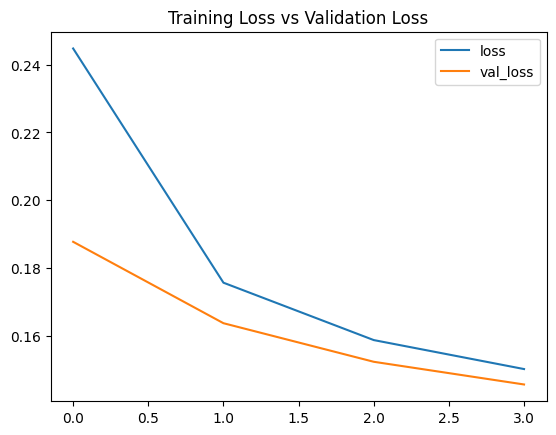

In [ ]:
import pandas as pd
metrics = pd.DataFrame(autoencoder.history.history)
plt.figure()
plt.plot(metrics['loss'],label='loss')
plt.plot(metrics['val_loss'],label='val_loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()

In [ ]:
decoded = autoencoder.predict(test_noise)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


Name:Shalini v  Register Number:212222240096


<ipython-input-27-802e2dd6b5dd>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, n, i+n)


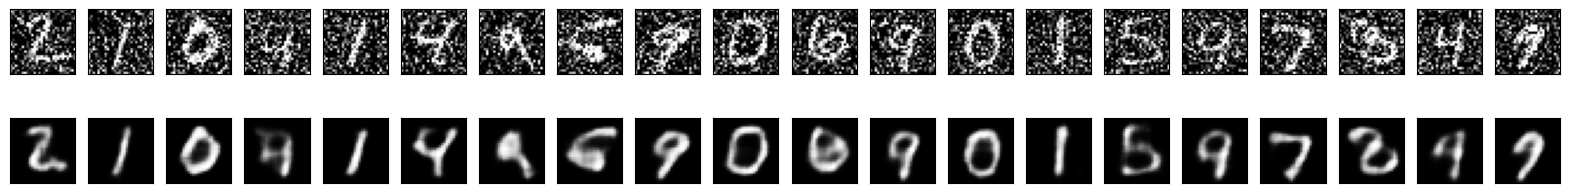

In [ ]:

n = 20
print('Name:Shalini v  Register Number:212222240096')
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):

    ax = plt.subplot(1, n, i)
    plt.imshow(test_scale[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n)
    plt.imshow(test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()